### Student's Contact Information:
**Name:** Gloria Moraa Angwenyi

**Email:** gloriaa@arizona.edu

## Part 1: Stream Data Pipeline Exercise using Apache Kafka

In [1]:
# Python client for the Apache Kafka distributed stream processing system.
!pip3 install kafka-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 5.6 MB/s eta 0:00:00


In [2]:
# https://cwiki.apache.org/confluence/display/AVRO/Index
!pip install avro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for avro: filename=avro-1.11.3-py2.py3-none-any.whl size=123912 sha256=b15e7d7ff87b14338143bc7fb4c4af3ff34712d86783443a15ffd60193aeb4b7
  Stored in directory: /root/.cache/pip/wheels/1d/f6/41/0e0399396af07060e64d4e32c8bd259b48b98a4a114df31294
Successfully built avro


In [3]:
!pip install fastavro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.7 MB/s eta 0:00:00


In [4]:
import time
import json
import kafka
from kafka import KafkaProducer
from kafka.errors import KafkaError
import io
import fastavro
import avro.schema
from avro.io import DatumWriter

In [5]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [6]:
SCHEMA_PATH = "/content/drive/MyDrive/Colab Notebooks/stock_schema.avsc"
SCHEMA = avro.schema.parse(open(SCHEMA_PATH).read())

'''
{
	"namespace": "stock_schema.avro",
	"type": "record",
	"name": "Stock",
	"fields": [
		{"name": "name", "type": "string"},
		{"name": "time",  "type": "string"},
		{"name": "price", "type": "float"}
	]
}
'''

'\n{\n\t"namespace": "stock_schema.avro",\n\t"type": "record",\n\t"name": "Stock",\n\t"fields": [\n\t\t{"name": "name", "type": "string"},\n\t\t{"name": "time",  "type": "string"},\n\t\t{"name": "price", "type": "float"}\n\t]\n}\n'

In [7]:
# Download Apache Kafka into session.
!curl -sSOL https://archive.apache.org/dist/kafka/3.1.0/kafka_2.13-3.1.0.tgz
!tar -xzf kafka_2.13-3.1.0.tgz

In [8]:
# start zookeeper server & kafka server set $KAFKA_HOME variable path in bashrc (i.e., a configuration file for the Bash shell).
!./kafka_2.13-3.1.0/bin/zookeeper-server-start.sh -daemon ./kafka_2.13-3.1.0/config/zookeeper.properties #--override delete.topic.enable=true
!./kafka_2.13-3.1.0/bin/kafka-server-start.sh -daemon ./kafka_2.13-3.1.0/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


In [9]:
#kafka properties are shown in the results.
!ps -ef | grep kafka

root        1832     129  0 20:39 ?        00:00:00 /bin/bash -c ps -ef | grep kafka
root        1834    1832  0 20:39 ?        00:00:00 grep kafka


In [10]:

topic = 'microsoft'
bootstrap_server = "localhost:9092"
producer = kafka.KafkaProducer(
    bootstrap_servers=[bootstrap_server]
)

### Get Stock Live Data from Yahoo Finance

In [11]:
!pip install yfinance

In [12]:
import yfinance as yf
import datetime

In [13]:
ticker = 'MSFT'
df = yf.download(tickers=ticker, start ='2021-08-03', end='2022-08-07')

[*********************100%%**********************]  1 of 1 completed


In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-03,285.420013,287.230011,284.000000,287.119995,281.472015,17879000
2021-08-04,286.220001,287.589996,284.649994,286.510010,280.874054,16191300
2021-08-05,286.880005,289.630005,286.100006,289.519989,283.824799,13900200
2021-08-06,288.510010,289.500000,287.619995,289.459991,283.766022,16589300
2021-08-09,289.750000,291.549988,287.809998,288.329987,282.658234,16117600


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_4, *['Open', 'High'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_5, *['High', 'Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_6, *['Low', 'Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_7, *['Close', 'Adj Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['Open', 'High', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['Open', 'Close', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['Open', 'Adj Close', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['Open', 'Volume', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_13, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_14, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_15, *['Close'], **{})
chart

Part 2: Streaming Data and Kafka: Data Storage and Visualization

In [15]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=89101b8ec0056deab0e78cfcbce8dba11d3a82207f0cd229baab7f5342d8c8c3
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [16]:
#sseclient is a Python client library for iterating over http Server Sent Event (SSE) streams
#(also known as EventSource, after the name of the Javascript interface inside browsers).
!pip install sseclient

  Preparing metadata (setup.py) ... done
  Created wheel for sseclient: filename=sseclient-0.0.27-py3-none-any.whl size=5562 sha256=a3176a8862f076914c3877479baa2b18ce4d512d7bb59fd6b1ad2c4499b8b29a
  Stored in directory: /root/.cache/pip/wheels/60/57/0e/09b1264923280e935a34cc543b7f147f5df12490bd7a992f42
Successfully built sseclient


In [17]:
!pip install kafka-python

In [18]:
# Mount google drive to /content/drive folder
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:
import os
from datetime import datetime
import time
import threading
import requests
from sseclient import SSEClient as EventSource

# Create producer
producer = KafkaProducer(
    bootstrap_servers='localhost:9092',
    value_serializer=lambda v: json.dumps(v).encode('utf-8') #json serializer
    )

In [26]:
# Read streaming event
streaming_duration = 10
start_time = time.time()

# Create a new csv file to store the streaming data.
f = open('/content/drive/MyDrive/csvfile/wikidata.csv', 'w')
f.write('{},{},{},{},{}\n'.format(                         # write csv headers to the file
    'server_name', 'type', 'user', 'title','comment'))
f.close()

streaming_url = 'https://stream.wikimedia.org/v2/stream/recentchange'

try:
    for event in EventSource(streaming_url):
      present_time = time.time()

      if present_time - start_time > streaming_duration:      # check if the data streaming needs to end
        print(end='\n'*2)
        print("Streaming ended.", end='\n'*2)
        producer.flush()
        # # producer.close()
        break

      if event.event == 'message':
          try:
              change = json.loads(event.data)             # convert json into dictionary
          except ValueError:
              pass
          else:
              #Send msg to topic wiki-changes
              topic = 'wiki-changes'
              producer.send(topic, change)

              type_filter = 'edit'
              #store Wiki recent change stream data
              wiki_data = {
                    'type': change['type'],
                    'server_name': change['server_name'],
                    'user': change['user'],
                    'title': change['title'],
                    'namespace': change['namespace'],
                    'comment': change['comment'],
                    'server_url': change['server_url'],
                    'server_script_path': change['server_script_path'],
                    'wiki': change['wiki'],
                    'parsedcomment': change['parsedcomment'],
                    'meta': {
                        'domain': change['meta']['domain'],
                        'dt': change['meta']['dt'],
                        'id': change['meta']['id'],},
                    'offset': change['meta']['offset'],
                    'partition': change['meta']['partition'],
                    'request_id': change['meta']['request_id'],
                    'stream': change['meta']['stream'],
              }

              print(wiki_data)

              f = open('/content/drive/MyDrive/csvfile/wikidata.csv', 'a')
              f.write('{},{},{},{},"{}"\n'.format(               # append recently updated data to the csv file
              wiki_data['server_name'],
              wiki_data['type'],
              wiki_data['user'],
              wiki_data['title'],
              wiki_data['comment']
              ))

except KeyboardInterrupt:
    print("process interrupted")


{'type': 'edit', 'server_name': 'fr.wikipedia.org', 'user': 'Ddesco75', 'title': 'René Régnault', 'namespace': 0, 'comment': '', 'server_url': 'https://fr.wikipedia.org', 'server_script_path': '/w', 'wiki': 'frwiki', 'parsedcomment': '', 'meta': {'domain': 'fr.wikipedia.org', 'dt': '2023-10-24T20:47:20Z', 'id': 'b76f492d-b88a-406f-aa41-109f71b79614'}, 'offset': 712044472, 'partition': 0, 'request_id': '3f2f182e-aa1b-445f-b05d-8951a6f13a83', 'stream': 'mediawiki.recentchange'}
{'type': 'categorize', 'server_name': 'commons.wikimedia.org', 'user': 'Benoit Soubeyran', 'title': 'Category:Creative Commons Attribution-Share Alike missing SDC copyright status', 'namespace': 14, 'comment': '[[:File:2023-10-11 Médiadix by Benoit Soubeyran 04.jpg]] added to category', 'server_url': 'https://commons.wikimedia.org', 'server_script_path': '/w', 'wiki': 'commonswiki', 'parsedcomment': '<a href="/wiki/File:2023-10-11_M%C3%A9diadix_by_Benoit_Soubeyran_04.jpg" title="File:2023-10-11 Médiadix by Benoit 

In [27]:
# Define the Kafka consumer
bootstrap_server = "localhost:9092"
group_id = "my_wiki"
consumer = kafka.KafkaConsumer(
    bootstrap_servers=[bootstrap_server],
    value_deserializer=lambda x: json.loads(x.decode('utf-8')),
    group_id = group_id
)

In [28]:
# Subsribe to a the topic
topic = 'wiki-changes'
consumer.subscribe(topics=[topic])
consumer.subscription()

{'wiki-changes'}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from pyspark import SparkConf, SparkContext
from pyspark.streaming import StreamingContext

conf = SparkConf().setMaster("local").setAppName("MIS584_Spark_Examples")
sc = SparkContext(conf = conf)

In [30]:
# Interrupt if no output being added.

try:
  change_userlist = []
  for message in consumer:

      print (message.value['user'])
      change_userlist.append(message.value['user'])

except KeyboardInterrupt:
    print("process interrupted")

# Count occurrences for each user
users_count = sc.parallelize(change_userlist).map(lambda word: (word, 1)).reduceByKey(
    lambda count1, count2: count1 + count2
)

# Sort word occurrences in the descending order
users_count_sorted = users_count.sortBy(lambda x: -x[1])

Ddesco75
Benoit Soubeyran
Polona Upload
Benoit Soubeyran
102.88.34.71
Benoit Soubeyran
Benoit Soubeyran
GrandCelinien
Benoit Soubeyran
Longpeak14
Benoit Soubeyran
Benoit Soubeyran
Ferhengvan
Benoit Soubeyran
Ferhengvan
KrBot
Benoit Soubeyran
Benoit Soubeyran
Ferhengvan
Ferhengvan
Benoit Soubeyran
Ferhengvan
Benoit Soubeyran
Qwerfjkl
Benoit Soubeyran
Benoit Soubeyran
Benoit Soubeyran
Benoit Soubeyran
Willthacheerleader18
Jobu0101
Dcirovicbot
Cewbot
Polona Upload
Cnwilliams
TiagoLubiana
Frietjes
Polona Upload
Polona Upload
Polona Upload
Polona Upload
TAnthony
Bamyers99
Ryoga Nica
LucaDrBiondi
KrBot
Plaça de Maig
Bearcat
Ferhengvan
Bamyers99
Pa1battula
Pa1battula
Guliolopez
Ferhengvan
TAnthony
DE8AH
Paweł Ziemian BOT
TAnthony
ArildV
KrBot
Bamyers99
SchlurcherBot
Williamstonhead
ColorfulSmoke
Jobu0101
Ferhengvan
Ferhengvan
Benoit Soubeyran
Ferhengvan
Cewbot
Ferhengvan
KrBot
Dcirovicbot
AJurno (WMB)
Plaça de Maig
Dcirovicbot
Gzen92Bot
Bamyers99
Benoit Soubeyran
Benoit Soubeyran
ColorfulSmok

                                      user  count
0                         Benoit Soubeyran     48
1                               Ferhengvan     23
2                                Gzen92Bot     14
3                            SchlurcherBot      9
4                                    Thadh      8
5                                   Cewbot      7
6                                Bamyers99      7
7                            Polona Upload      6
8                              Dcirovicbot      6
9                            ColorfulSmoke      6
10                                 RaveDog      6
11                               Stortford      6
12                      Siebenschläferchen      5
13                                   KrBot      4
14                                Jobu0101      4
15                           Plaça de Maig      4
16                                   DE8AH      4
17                                  ArildV      4
18  2001:8F8:1B27:5364:DDDA:5224:4CB6:5644      4


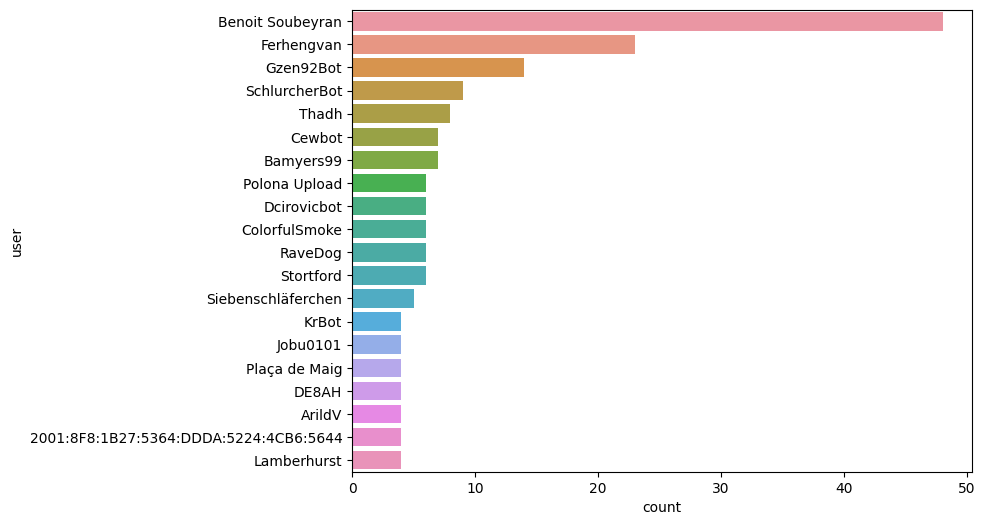

In [32]:
import seaborn as sns
import matplotlib


# Plot top 20 users from the list
top20_users = users_count_sorted.take(20)
top20_pd = pd.DataFrame(top20_users, columns=['user', 'count'])
print(top20_pd)

sns.set_color_codes("muted")
# Initialize the matplotlib figure
plt.figure(figsize=(8,6))

print("+++++++++++++++++++++")
print("Graph - Top 20 Users")
print("+++++++++++++++++++++")
try:
    # Barplot
    sns.barplot(x='count', y='user', data=top20_pd)

    # Show barplot
    plt.show()
except ValueError:
    # If Dataframe is empty, pass
    pass


